# Classification 

In this example, we will classify mushrooms as being edible or poisonous depending on different features. Logistic regression, linear discriminant analysis and quadratic discriminant analysis will be used.

The data set contains 8124 rows and the following features:

`class`: edible(e) or poisonous(p)

`cap-shape`: bell(b), conical(c), convex(x), flat(f), knobbed(k), sunken(s)

`cap-surface`: fibrous(f), grooves(g), scaly(y), smooth(s)

`cap-color`: brown(n), buff(b), cinnamon(c), gray(g), green(r), pink(p), purple(u), red(e), white(w), yellow(y)

`bruises`: bruises(t), no bruises(f)

`odor`: almond(a), anise(l), creosote(c), fishy(y), foul(f), musty(m), none(n), pungent(p), spicy(s)

`gill-attachment`: attached(a), descending(d), free(f), notched(n)

`gill-spacing`: close(c), crowded(w), distant(d)

`gill-size`: broad(b), narrow(n)

`gill-color`: black(k), brown(n), buff(b), chocolate(h), gray(g), green(r), orange(o), pink(p), purple(u), red(e), white(w), yellow(y)

`stalk-shape`: enlarging(e), tapering(t)

`stalk-root`: bulbous(b), club(c), cup(u), equal(e), rhizomorphs(z), rooted(r), missing(?)

`stalk-surface-above-ring`: fibrous(f), scaly(y), silky(k), smooth(s)

`stalk-surface-below-ring`: fibrous(f), scaly(y), silky(k), smooth(s)

`stalk-color-above-ring`: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

`stalk-color-below-ring`: brown(n), buff(b), cinnamon(c), gray(g), orange(o), pink(p), red(e), white(w), yellow(y)

`veil-type`: partial(p), universal(u)

`veil-color`: brown(n), orange(o), white(w), yellow(y)

`ring-number`: none(n), one(o), two(t)

`ring-type`: cobwebby(c), evanescent(e), flaring(f), large(l), none(n), pendant(p), sheathing(s), zone(z)

`spore-print-color`: black(k), brown(n), buff(b), chocolate(h), green(r), orange(o), purple(u), white(w), yellow(y)

`population`: abundant(a), clustered(c), numerous(n), scattered(s), several(v), solitary(y)

`habitat`: grasses(g), leaves(l), meadows(m), paths(p), urban(u), waste(w), woods(d)

## Import libraries 

In [62]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, auc, confusion_matrix

%matplotlib inline

In [ ]:
DATAPATH = 'data/mushrooms.csv'

data = pd.read_csv(DATAPATH)
data.head()

In [ ]:
x = data['class']
ax = sns.countplot(x=x, data=data)

In [ ]:
def plot_data(hue, data):
    for i, col in enumerate(data.columns):
        plt.figure(i)
        ax = sns.countplot(x=data[col], hue=hue, data=data)

## Preprocessing 

In [ ]:
for col in data.columns:
    print(f"{col}: {data[col].isnull().sum()}")

In [ ]:
data.describe()

In [ ]:
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])

data.head()

In [ ]:
encoded_data = pd.get_dummies(data)
encoded_data

## Model 

In [ ]:
y = data['class'].values.reshape(-1, 1)
X = encoded_data.drop(['class'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Logistic regression 

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic_reg = LogisticRegression()

logistic_reg.fit(X_train, y_train.ravel())

y_prob = logistic_reg.predict_proba(X_test)[:,1]
y_pred = np.where(y_prob > 0.5, 1, 0)

In [ ]:
log_confusion_matrix = confusion_matrix(y_test, y_pred)
log_confusion_matrix

In [ ]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

In [ ]:
def plot_roc(roc_auc):
    plt.figure(figsize=(7,7))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True positive rate')
    plt.xlabel('False positive rate')

In [ ]:
plot_roc(roc_auc)

### Linear Discriminant Analysis (LDA) 

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [52]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train.ravel())

y_prob_lda = lda.predict_proba(X_test)[:,1] 
y_pred_lda = np.where(y_prob_lda > 0.5, 1, 0) # this means that if the probability is greater than 0.5, then the output is 1, otherwise the output is 0


In [53]:
lda_confusion_matrix = confusion_matrix(y_test, y_pred_lda)  # confusion matrix means that if the output is 1, then the prediction is 1, otherwise the prediction is 0 and the confusion matrix should be a diagonal line from the top-left to the bottom-right
lda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [54]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_lda) # roc curve is a graph showing the performance of a classification model at all classification thresholds
# false positive rate here means that the model predicted the output to be 1 when the actual output is 0, and the true positive rate means that the model predicted the output to be 1 when the actual output is 1

roc_auc_lda = auc(false_positive_rate, true_positive_rate) # auc means that the model predicted the output to be 1 when the actual output is 1 and the true positive rate means that the model predicted the output to be 1 when the actual output is 1, this is impactful to see and analyze by data scientists in practice because of the fact that it shows the performance of the model at all classification thresholds

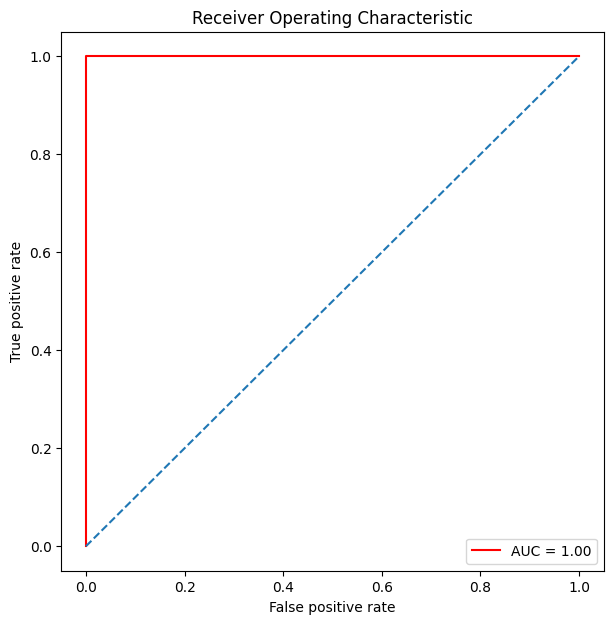

In [55]:
plot_roc(roc_auc_lda)

### Quadratic Discriminant Analysis (QDA) 

In [56]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [57]:
qda = QuadraticDiscriminantAnalysis()

qda.fit(X_train, y_train.ravel())

y_prob_qda = qda.predict_proba(X_test)[:,1]
y_pred_qda = np.where(y_prob_qda > 0.5, 1, 0)

/mnt/c/Users/Som/Desktop/Data-Science-Notes/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/mnt/c/Users/Som/Desktop/Data-Science-Notes/.venv/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(


In [58]:
qda_confusion_matrix = confusion_matrix(y_test, y_pred_qda)
qda_confusion_matrix

array([[843,   0],
       [  0, 782]])

In [59]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob_qda)
roc_auc_qda = auc(false_positive_rate, true_positive_rate)
roc_auc_qda

np.float64(1.0)

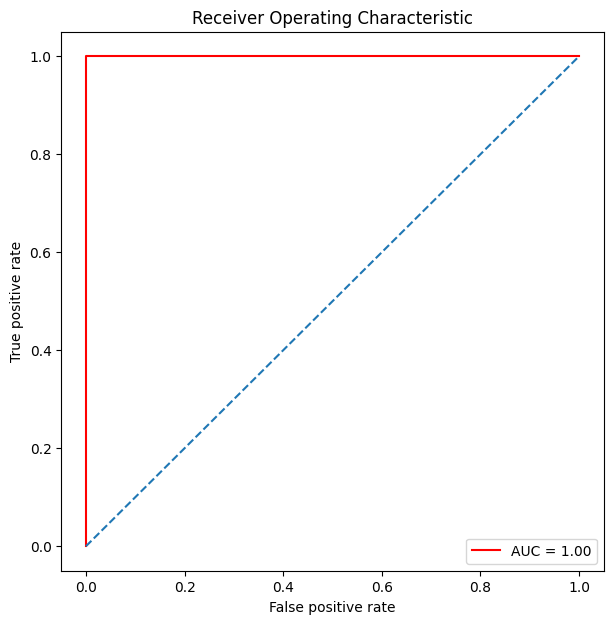

In [60]:
plot_roc(roc_auc_qda)

In [63]:
lin_reg = LinearRegression()
MSEs = cross_val_score(lin_reg, X, y, scoring='neg_mean_squared_error', cv=5)
mean_MSE = np.mean(MSEs)
print(-mean_MSE)

0.008517268023953698
